# 특명 잠재 구독연장자를 찾아라!

이번 프로젝트는 학습 서비스를 이용하는 독자들 중 누가 서비스 구독을 연장할지 예측하기 위한 사전 파악에 초점을 맞추고 있습니다. 우리의 목표는 유저들의 학습 습관, 선호도, 이용 행태 등 다양한 측면을 면밀히 분석하는 것입니다.

# 데이터 살펴보기

In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_table('data/mini.csv',sep=',')

In [5]:
data

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
0,b919c29d,13,14,14.946163,8.427187,18,16,68.360455,3,4,Low,Basic,4,5,0
1,a0a60abb,16,18,18.453224,72.646087,16,13,97.567322,2,3,Medium,Basic,1,6,1
2,b9f171ae,22,1,16.195228,21.774492,13,14,94.358763,3,4,Medium,Premium,0,7,1
3,5dc0ba8b,1,19,17.628656,42.659066,19,18,70.153228,0,3,Low,Basic,1,0,1
4,65c83654,4,5,21.390656,30.744287,19,10,81.917908,2,4,Medium,Basic,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,ae6b76bc,22,29,14.727623,84.053558,18,16,64.966803,2,5,Low,Premium,1,1,1
9996,24588752,10,11,19.374054,45.464833,9,8,82.750244,3,3,Medium,Basic,2,7,1
9997,e4622a54,7,27,18.240978,127.302411,24,14,81.567839,3,5,High,Basic,1,6,1
9998,e07fbad9,11,7,18.783800,5.297234,10,10,89.885656,4,5,Low,Basic,2,0,1


범주형 데이터는 preferred_difficulty_level, subscription_type, community_engagement_level, payment_pattern 이 네가지로 정리된다

In [5]:
data.describe()

,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,customer_inquiry_history,payment_pattern,target
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,11.897400,15.013200,14.994076,54.917720,12.545400,12.227500,75.029513,3.043600,3.886100,2.010500,3.502900,0.619900
std,6.600896,8.362573,3.001869,56.024310,6.932239,3.634125,9.968529,1.755052,1.262175,1.420983,2.311261,0.485435
min,1.000000,1.000000,2.366189,0.011515,1.000000,1.000000,35.941755,0.000000,1.000000,0.000000,0.000000,0.000000
25%,6.000000,8.000000,13.025597,15.276611,7.000000,10.000000,68.278054,2.000000,3.000000,1.000000,1.000000,0.000000
50%,12.000000,15.000000,14.979228,37.578818,13.000000,12.000000,75.126061,3.000000,4.000000,2.000000,4.000000,1.000000
75%,18.000000,22.000000,16.995340,75.584200,19.000000,15.000000,81.718976,4.000000,5.000000,3.000000,6.000000,1.000000
max,23.000000,29.000000,26.998490,503.372616,24.000000,27.000000,112.643828,12.000000,5.000000,10.000000,7.000000,1.000000


# 데이터 전처리

피쳐들만 볼 수 있도록 user_id를 set_index해주장

In [6]:
data = data.set_index('user_id')
data

,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
user_id,,,,,,,,,,,,,,
b919c29d,13,14,14.946163,8.427187,18,16,68.360455,3,4,Low,Basic,4,5,0
a0a60abb,16,18,18.453224,72.646087,16,13,97.567322,2,3,Medium,Basic,1,6,1
b9f171ae,22,1,16.195228,21.774492,13,14,94.358763,3,4,Medium,Premium,0,7,1
5dc0ba8b,1,19,17.628656,42.659066,19,18,70.153228,0,3,Low,Basic,1,0,1
65c83654,4,5,21.390656,30.744287,19,10,81.917908,2,4,Medium,Basic,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ae6b76bc,22,29,14.727623,84.053558,18,16,64.966803,2,5,Low,Premium,1,1,1
24588752,10,11,19.374054,45.464833,9,8,82.750244,3,3,Medium,Basic,2,7,1
e4622a54,7,27,18.240978,127.302411,24,14,81.567839,3,5,High,Basic,1,6,1


In [180]:
data.isnull().sum() # 혹시 모르니 결측치 체크

subscription_duration                0
recent_login_time                    0
average_login_time                   0
average_time_per_learning_session    0
monthly_active_learning_days         0
total_completed_courses              0
recent_learning_achievement          0
abandoned_learning_sessions          0
community_engagement_level           0
preferred_difficulty_level           0
subscription_type                    0
customer_inquiry_history             0
payment_pattern                      0
target                               0
dtype: int64

결측치 없음

In [179]:
data.duplicated().sum() # 혹시 모르니 중복값 체크

0

중복값 없음

In [181]:
data['target'].value_counts()

target
1    6199
0    3801
Name: count, dtype: int64

전체인원의 구독 연장률은 61.99%

# 정수형 칼럼중 가장 상관관계가 큰것을 한번 보자!

가설: 정수형 칼럼들과 target 칼럼의 상관관계가 0.5 이상이면 좀 관련이 있지 않을까??

범주형(문자열) 데이터 칼럼 삭제 실시

In [7]:
df=data.drop('subscription_type',axis=1)
df2=df.drop('preferred_difficulty_level',axis=1)
df3=df2.drop('community_engagement_level',axis=1)
df4=df3.drop('payment_pattern',axis=1)

df4

,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,customer_inquiry_history,target
user_id,,,,,,,,,,
b919c29d,13,14,14.946163,8.427187,18,16,68.360455,3,4,0
a0a60abb,16,18,18.453224,72.646087,16,13,97.567322,2,1,1
b9f171ae,22,1,16.195228,21.774492,13,14,94.358763,3,0,1
5dc0ba8b,1,19,17.628656,42.659066,19,18,70.153228,0,1,1
65c83654,4,5,21.390656,30.744287,19,10,81.917908,2,3,1
...,...,...,...,...,...,...,...,...,...,...
ae6b76bc,22,29,14.727623,84.053558,18,16,64.966803,2,1,1
24588752,10,11,19.374054,45.464833,9,8,82.750244,3,2,1
e4622a54,7,27,18.240978,127.302411,24,14,81.567839,3,1,1


상관관계를 알수 있는 corr 메소드 사용

In [8]:
corr=df4.corr()
corr

,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,customer_inquiry_history,target
subscription_duration,1.000000,0.014754,-0.000031,0.006324,0.002193,-0.001662,0.007875,0.014414,-0.005174,-0.006710
recent_login_time,0.014754,1.000000,-0.006113,-0.004650,-0.015338,-0.000142,0.005768,-0.015882,0.011653,-0.004184
average_login_time,-0.000031,-0.006113,1.000000,-0.007382,0.002294,-0.012416,-0.005967,0.013661,0.009768,-0.008527
average_time_per_learning_session,0.006324,-0.004650,-0.007382,1.000000,-0.001678,0.081332,-0.008231,-0.014488,-0.001397,0.118261
monthly_active_learning_days,0.002193,-0.015338,0.002294,-0.001678,1.000000,0.004816,0.030110,-0.007512,-0.016704,0.004876
total_completed_courses,-0.001662,-0.000142,-0.012416,0.081332,0.004816,1.000000,-0.002416,0.012322,-0.014949,-0.004040
recent_learning_achievement,0.007875,0.005768,-0.005967,-0.008231,0.030110,-0.002416,1.000000,0.002115,0.005612,0.002294
abandoned_learning_sessions,0.014414,-0.015882,0.013661,-0.014488,-0.007512,0.012322,0.002115,1.000000,-0.007322,-0.019636
customer_inquiry_history,-0.005174,0.011653,0.009768,-0.001397,-0.016704,-0.014949,0.005612,-0.007322,1.000000,0.000277
target,-0.006710,-0.004184,-0.008527,0.118261,0.004876,-0.004040,0.002294,-0.019636,0.000277,1.000000


In [9]:
corr_target=corr['target'].sort_values(ascending=False) #target과 다른 요소들의 상관관계를 내림차순으로 정렬해봐라
corr_target

target                               1.000000
average_time_per_learning_session    0.118261
monthly_active_learning_days         0.004876
recent_learning_achievement          0.002294
customer_inquiry_history             0.000277
total_completed_courses             -0.004040
recent_login_time                   -0.004184
subscription_duration               -0.006710
average_login_time                  -0.008527
abandoned_learning_sessions         -0.019636
Name: target, dtype: float64

<Axes: >

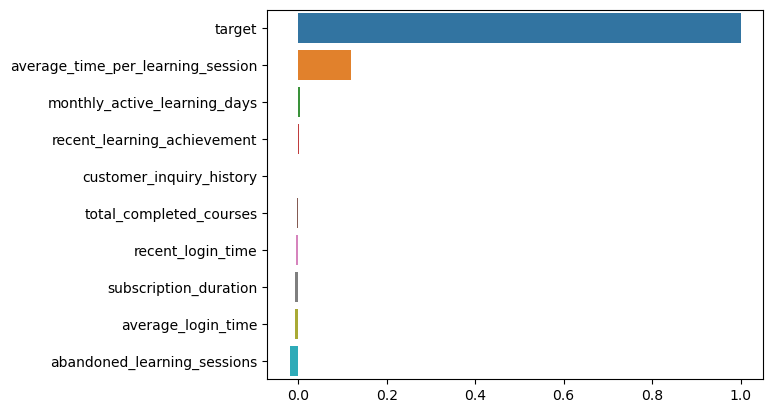

In [10]:
sns.barplot(x=corr_target.values, y=corr_target.index)

시각화를 해보니 target과 target끼리의 상관관계가 당연히 1이라 얘만 너무커서 다른게 보기 쉽지 않으므로 corr에서 target열 삭제

In [11]:
corr2= corr_target.drop('target')
corr2

average_time_per_learning_session    0.118261
monthly_active_learning_days         0.004876
recent_learning_achievement          0.002294
customer_inquiry_history             0.000277
total_completed_courses             -0.004040
recent_login_time                   -0.004184
subscription_duration               -0.006710
average_login_time                  -0.008527
abandoned_learning_sessions         -0.019636
Name: target, dtype: float64

<Axes: >

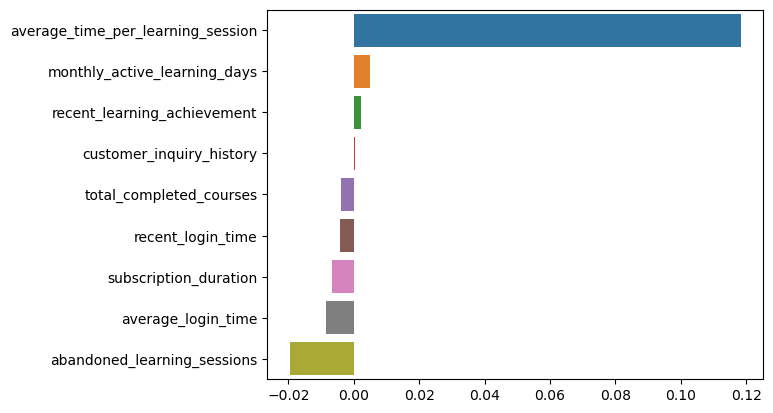

In [12]:
sns.barplot(x=corr2.values, y=corr2.index)

이는 target
젤 높은 상관관계가 average_time_per_learning_session( 각 학습 세션에 소요된 평균 시간) 인데 0.12로 매우매우 미미함.               
음의 관계로 봐도 abandoned_learning_session의 -0.02가 제일 큰 값으로 미미함. 
정수형 데이터들은 큰 상관관계가 없어보임...      
그럼 일단 아까 지워버린 우리의 범주형 데이터들을 먼저 한번 살펴보자.

# 범주형 데이터들과 구독 연장 여부의 상관관계를 살펴보자!

유의미한 수치는 구독 유지자 수 비율 70% 이상으로 설정한다.

## 가설: 구독 유형에 따라 구독 연장 의사 여부는 다를것이다!!

일단 그럼 새 데이터 프레임을 짜보자

In [26]:
data['target']

user_id
b919c29d    0
a0a60abb    1
b9f171ae    1
5dc0ba8b    1
65c83654    1
           ..
ae6b76bc    1
24588752    1
e4622a54    1
e07fbad9    1
e12dcb55    0
Name: target, Length: 10000, dtype: int64

In [13]:
type_target = data.groupby('subscription_type')['target'].value_counts() #구독 유형별 target 겂 갯수 구하기
type_target

subscription_type  target
Basic              1         3683
                   0         2296
Premium            1         2516
                   0         1505
Name: count, dtype: int64

시각화하려니 애매해서 Basic과 Premium 각자의 target 데이터에 대한 데이터 프레임을 만드는게 나을 것 같다는 생각이 듦.

In [14]:
basic_target = df[data['subscription_type']=='Basic']['target'].value_counts() # Basic 구독 유형의 target 값 갯수
premium_target = df[data['subscription_type']=='Premium']['target'].value_counts() # Premium 구독 유형의 target 값 갯수
basic_target

target
1    3683
0    2296
Name: count, dtype: int64

In [15]:
premium_target

target
1    2516
0    1505
Name: count, dtype: int64

In [16]:
premium_target[1]

2516

In [17]:
premium_user = [premium_target[1], premium_target[0]] #파이차트에 넣을 데이터 생성
premium_user

[2516, 1505]

In [18]:
basic_user = [basic_target[1], basic_target[0]]
basic_user

[3683, 2296]

In [19]:
import koreanize_matplotlib

In [20]:
labels=['유지O','유지X']

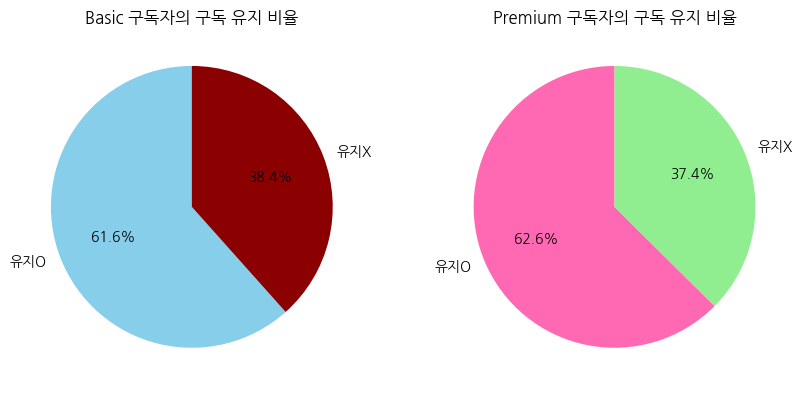

In [21]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].pie(basic_target, labels=labels, autopct='%.1f%%',colors=['skyblue','darkred'],startangle=90)
axs[0].set_title('Basic 구독자의 구독 유지 비율')

axs[1].pie(premium_user, labels=labels, autopct='%.1f%%',colors=['hotpink','lightgreen'],startangle=90)
axs[1].set_title('Premium 구독자의 구독 유지 비율')

plt.show()

그만 알아보자. 

양단의 차이가 없는것 같으므로 subscription_type을 단독으로 분석하는 것은 하지 않겠음.

##  고럼 Community engagement level을 살펴볼까...?

가설: 커뮤니티의 이용이 활발할 수록 구독 연장 확률이 높다?

In [22]:
data['community_engagement_level']

user_id
b919c29d    4
a0a60abb    3
b9f171ae    4
5dc0ba8b    3
65c83654    4
           ..
ae6b76bc    5
24588752    3
e4622a54    5
e07fbad9    5
e12dcb55    5
Name: community_engagement_level, Length: 10000, dtype: int64

In [23]:
comm_target = data.groupby('community_engagement_level')['target'].value_counts() #구독 유형별 target 겂 갯수 구하기
comm_target

community_engagement_level  target
1                           1          348
                            0          211
2                           1          751
                            0          468
3                           1          968
                            0          620
4                           1         1265
                            0          805
5                           1         2867
                            0         1697
Name: count, dtype: int64

In [45]:
comm1_target = df[data['community_engagement_level']==1]['target'].value_counts()
comm2_target = df[data['community_engagement_level']==2]['target'].value_counts()
comm3_target = df[data['community_engagement_level']==3]['target'].value_counts()
comm4_target = df[data['community_engagement_level']==4]['target'].value_counts()
comm5_target = df[data['community_engagement_level']==5]['target'].value_counts()

comm1_target,comm2_target,comm3_target,comm4_target,comm5_target

(target
 1    348
 0    211
 Name: count, dtype: int64,
 target
 1    751
 0    468
 Name: count, dtype: int64,
 target
 1    968
 0    620
 Name: count, dtype: int64,
 target
 1    1265
 0     805
 Name: count, dtype: int64,
 target
 1    2867
 0    1697
 Name: count, dtype: int64)

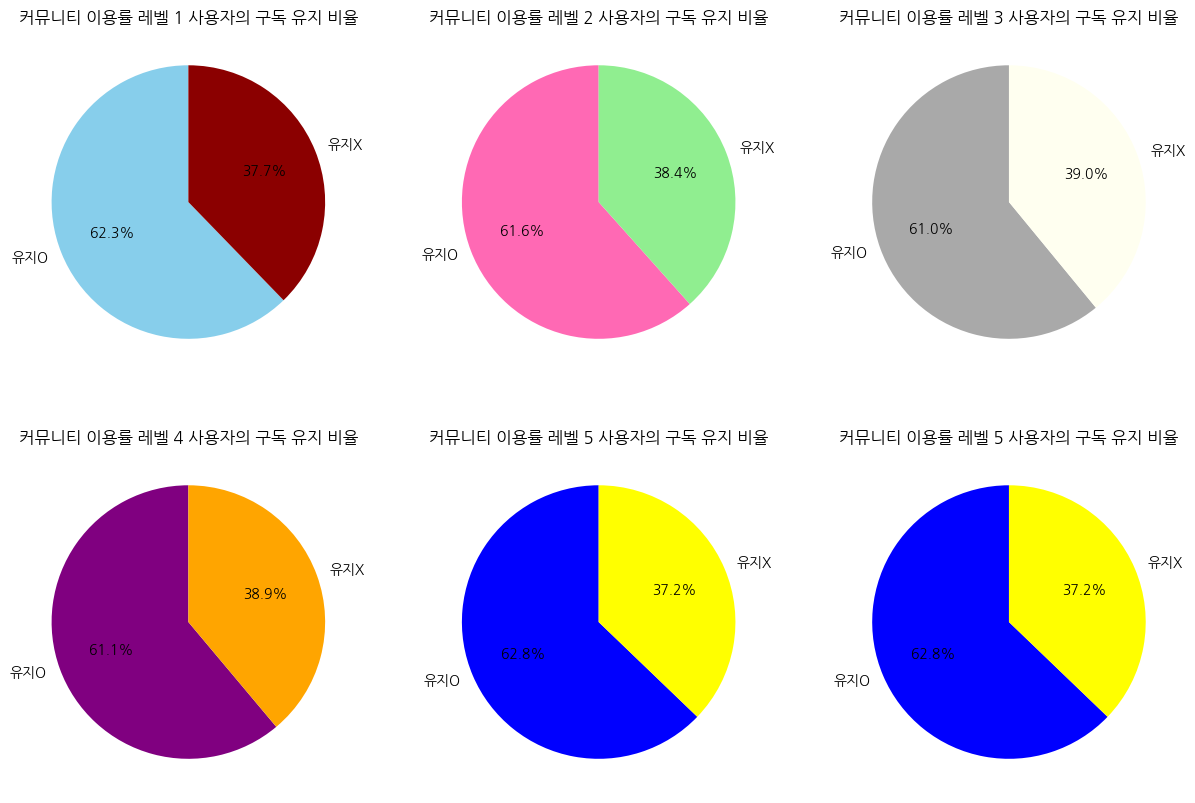

In [31]:
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

axs[0][0].pie(comm1_target, labels=labels, autopct='%.1f%%',colors=['skyblue','darkred'],startangle=90)
axs[0][0].set_title('커뮤니티 이용률 레벨 1 사용자의 구독 유지 비율')

axs[0][1].pie(comm2_target, labels=labels, autopct='%.1f%%',colors=['hotpink','lightgreen'],startangle=90)
axs[0][1].set_title('커뮤니티 이용률 레벨 2 사용자의 구독 유지 비율')

axs[0][2].pie(comm3_target, labels=labels, autopct='%.1f%%',colors=['darkgrey','ivory'],startangle=90)
axs[0][2].set_title('커뮤니티 이용률 레벨 3 사용자의 구독 유지 비율')

axs[1][0].pie(comm4_target, labels=labels, autopct='%.1f%%',colors=['purple','orange'],startangle=90)
axs[1][0].set_title('커뮤니티 이용률 레벨 4 사용자의 구독 유지 비율')

axs[1][1].pie(comm5_target, labels=labels, autopct='%.1f%%',colors=['blue','yellow'],startangle=90)
axs[1][1].set_title('커뮤니티 이용률 레벨 5 사용자의 구독 유지 비율')

axs[1][2].pie(comm5_target, labels=labels, autopct='%.1f%%',colors=['blue','yellow'],startangle=90)
axs[1][2].set_title('커뮤니티 이용률 레벨 5 사용자의 구독 유지 비율')


plt.show()

얘도 그만 알아보자.

## 그럼 선호 난이도는 관련이 있을까?

가설: 어려운 내용을 선호할 수록 구독을 연장하려고 할지도 몰라!

In [29]:
data.groupby('preferred_difficulty_level')['target'].value_counts() 

preferred_difficulty_level  target
High                        1         1241
                            0          759
Low                         1         3047
                            0         1945
Medium                      1         1911
                            0         1097
Name: count, dtype: int64

In [136]:
diff1_target = df[data['preferred_difficulty_level']=="Low"]['target'].value_counts()
diff2_target = df[data['preferred_difficulty_level']=="Medium"]['target'].value_counts()
diff3_target = df[data['preferred_difficulty_level']=="High"]['target'].value_counts()

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

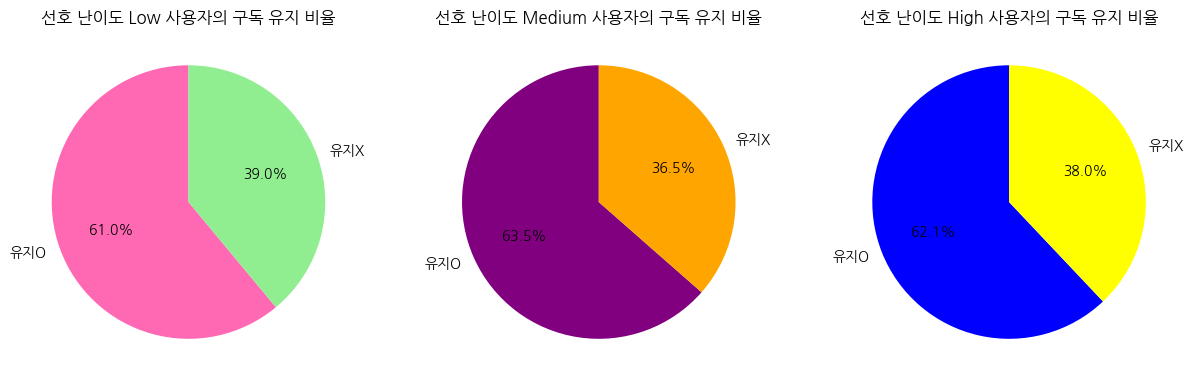

In [33]:
fig, axs = plt.subplots(1, 3, figsize=(15, 10))

axs[0].pie(diff1_target, labels=labels, autopct='%.1f%%',colors=['hotpink','lightgreen'],startangle=90)
axs[0].set_title('선호 난이도 Low 사용자의 구독 유지 비율')

axs[1].pie(diff2_target, labels=labels, autopct='%.1f%%',colors=['purple','orange'],startangle=90)
axs[1].set_title('선호 난이도 Medium 사용자의 구독 유지 비율')

axs[2].pie(diff3_target, labels=labels, autopct='%.1f%%',colors=['blue','yellow'],startangle=90)
axs[2].set_title('선호 난이도 High 사용자의 구독 유지 비율')

plt.show()

## 최후의 보루 최근 구독 패턴에 따라 다를 수도 있어!

In [35]:
data.groupby('payment_pattern')['target'].value_counts() 

payment_pattern  target
0                1         807
                 0         468
1                1         783
                 0         502
2                1         747
                 0         459
3                1         763
                 0         467
4                1         753
                 0         461
5                1         750
                 0         488
6                1         801
                 0         467
7                1         795
                 0         489
Name: count, dtype: int64

In [37]:
pay0_target = df[data['payment_pattern']==0]['target'].value_counts()
pay1_target = df[data['payment_pattern']==1]['target'].value_counts()
pay2_target = df[data['payment_pattern']==2]['target'].value_counts()
pay3_target = df[data['payment_pattern']==3]['target'].value_counts()
pay4_target = df[data['payment_pattern']==4]['target'].value_counts()
pay5_target = df[data['payment_pattern']==5]['target'].value_counts()
pay6_target = df[data['payment_pattern']==6]['target'].value_counts()
pay7_target = df[data['payment_pattern']==7]['target'].value_counts()

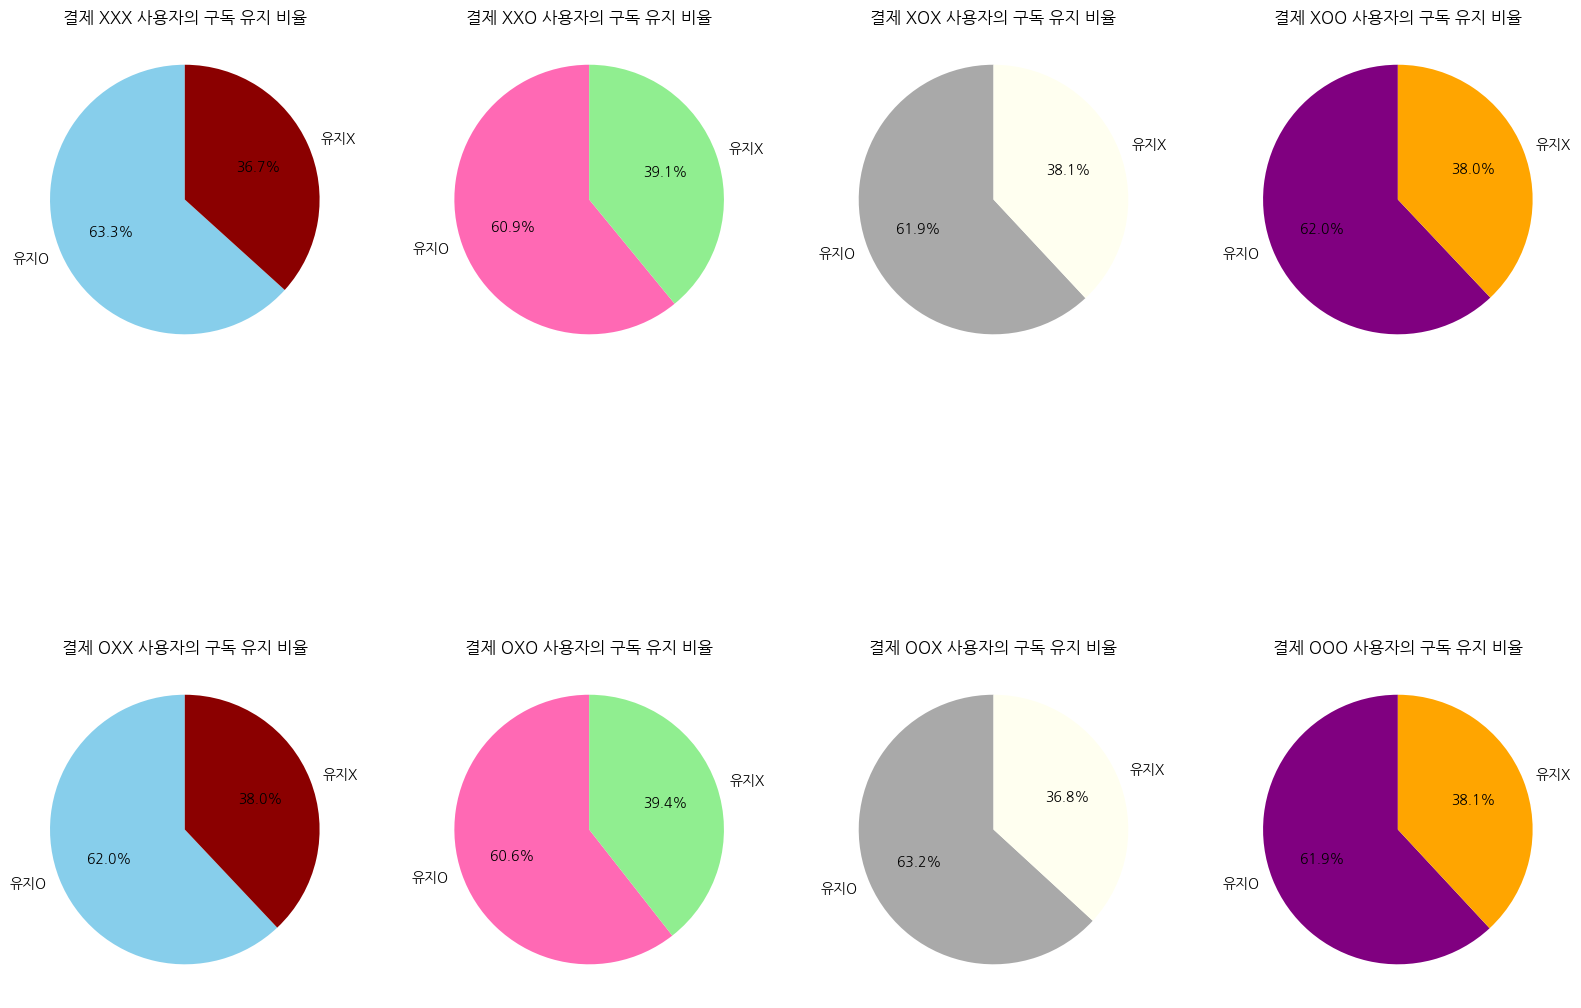

In [43]:
fig, axs = plt.subplots(2, 4, figsize=(20, 15))

axs[0][0].pie(pay0_target, labels=labels, autopct='%.1f%%',colors=['skyblue','darkred'],startangle=90)
axs[0][0].set_title('결제 XXX 사용자의 구독 유지 비율')

axs[0][1].pie(pay1_target, labels=labels, autopct='%.1f%%',colors=['hotpink','lightgreen'],startangle=90)
axs[0][1].set_title('결제 XXO 사용자의 구독 유지 비율')

axs[0][2].pie(pay2_target, labels=labels, autopct='%.1f%%',colors=['darkgrey','ivory'],startangle=90)
axs[0][2].set_title('결제 XOX 사용자의 구독 유지 비율')

axs[0][3].pie(pay3_target, labels=labels, autopct='%.1f%%',colors=['purple','orange'],startangle=90)
axs[0][3].set_title('결제 XOO 사용자의 구독 유지 비율')

axs[1][0].pie(pay4_target, labels=labels, autopct='%.1f%%',colors=['skyblue','darkred'],startangle=90)
axs[1][0].set_title('결제 OXX 사용자의 구독 유지 비율')

axs[1][1].pie(pay5_target, labels=labels, autopct='%.1f%%',colors=['hotpink','lightgreen'],startangle=90)
axs[1][1].set_title('결제 OXO 사용자의 구독 유지 비율')

axs[1][2].pie(pay6_target, labels=labels, autopct='%.1f%%',colors=['darkgrey','ivory'],startangle=90)
axs[1][2].set_title('결제 OOX 사용자의 구독 유지 비율')

axs[1][3].pie(pay7_target, labels=labels, autopct='%.1f%%',colors=['purple','orange'],startangle=90)
axs[1][3].set_title('결제 OOO 사용자의 구독 유지 비율')

plt.show()

인자를 하나씩 단독으로 보기엔 무리가 있다.

# 범주형 데이터 묶어서 살펴보기

In [12]:
bumzu_group = data.groupby(['subscription_type','preferred_difficulty_level','community_engagement_level','payment_pattern']).agg({'target': 'mean'}).reset_index()

In [13]:
bumzu_group

,subscription_type,preferred_difficulty_level,community_engagement_level,payment_pattern,target
0,Basic,High,1,0,0.648649
1,Basic,High,1,1,0.666667
2,Basic,High,1,2,0.720000
3,Basic,High,1,3,0.666667
4,Basic,High,1,4,0.785714
...,...,...,...,...,...
171,Premium,Medium,5,3,0.657895
172,Premium,Medium,5,4,0.583333
173,Premium,Medium,5,5,0.656250
174,Premium,Medium,5,6,0.684211


In [14]:
bumzu_oreum=bumzu_group.sort_values(by='target', ascending=False)
bumzu_oreum

,subscription_type,preferred_difficulty_level,community_engagement_level,payment_pattern,target
26,Basic,High,4,2,0.909091
153,Premium,Medium,3,1,0.846154
97,Basic,Medium,4,1,0.800000
34,Basic,High,5,2,0.793103
4,Basic,High,1,4,0.785714
...,...,...,...,...,...
113,Premium,High,3,1,0.444444
125,Premium,High,4,5,0.428571
115,Premium,High,3,3,0.428571
16,Basic,High,3,0,0.409091


In [15]:
bumzu_oreum.head(10)

,subscription_type,preferred_difficulty_level,community_engagement_level,payment_pattern,target
26,Basic,High,4,2,0.909091
153,Premium,Medium,3,1,0.846154
97,Basic,Medium,4,1,0.800000
34,Basic,High,5,2,0.793103
4,Basic,High,1,4,0.785714
121,Premium,High,4,1,0.782609
118,Premium,High,3,6,0.782609
32,Basic,High,5,0,0.781250
24,Basic,High,4,0,0.764706
158,Premium,Medium,3,6,0.750000


상위 25개의 범주 그룹이 구독 유지비율 70% 이상을 만족!
특히 구독 타입이 Basic, 선호데이터가 High, 커뮤니티 참여도가 4, 최근 3달중 가운데달에만 결제한 사람이 이번달에 구독을 할 확률이 0.909091!

In [240]:
target_group = df[(data['subscription_type'] == 'Basic') & (data['preferred_difficulty_level'] == 3) & (data['community_engagement_level'] == 4) & (data['payment_pattern'] ==2)]

In [241]:
target_group['target'].value_counts()

target
1    20
0     2
Name: count, dtype: int64

총 22명중 20명이 구독 의사 밝힘!

In [160]:
target_group2 = df[(data['subscription_type'] == 'Premium') & (data['preferred_difficulty_level'] == 2) & (data['community_engagement_level'] == 3) & (data['payment_pattern'] == 1)]

In [161]:
target_group2['target'].value_counts() 

target
1    33
0     6
Name: count, dtype: int64

총 39명중 33명이 구독의사를 밝힘!

In [242]:
target_group3 = df[(data['subscription_type'] == 'Basic') & (data['preferred_difficulty_level'] == 3) & (data['community_engagement_level'] == 5) & (data['payment_pattern'] ==2)]
target_group3['target'].value_counts() 

target
1    23
0     6
Name: count, dtype: int64

In [251]:
tg= df[(data['subscription_type'] == 'Basic') & (data['preferred_difficulty_level'] == 3) & (data['community_engagement_level'] >= 4) & (data['payment_pattern'] ==2)]
tg['target'].value_counts() 

target
1    43
0     8
Name: count, dtype: int64